# Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
beers_df = pd.read_csv("../beer_dataset/beers.csv", index_col=0)
breweries_df = pd.read_csv("../beer_dataset/breweries.csv", index_col=0)

# Informações preliminares sobres os dados

In [5]:
dfs = [beers_df, breweries_df]

for df in dfs:
    print(df.info())
    print(df.describe())
    print(df.head(3))

    print(f'''#############################
#############################''')

<class 'pandas.core.frame.DataFrame'>
Index: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 150.6+ KB
None
               abv          ibu           id   brewery_id       ounces
count  2348.000000  1405.000000  2410.000000  2410.000000  2410.000000
mean      0.059773    42.713167  1431.113278   231.749793    13.592241
std       0.013542    25.954066   752.459975   157.685604     2.352204
min       0.001000     4.000000     1.000000     0.000000     8.400000
25%       0.050000    21.000000   808.250000    93.000000    12.000000
50%       0.056000    35.000000  14

Algumas anotaçõe sobre jargões do mercado de cerverjas e sobre este dataset:

* ABV: Quantidade de álcool que a cerveja possui. Nesse dataset vai de 0 (Sem álcool) a 1 (Álcool puro);
* IBU: Internatinonal Bittering Units (Unidades Internacionais de Amargor) indicam o quão amarga uma cerveja é;
* ounces: Tamanho da cerveja em oz. 

# Data Wrangling: 
## Ajuste dos dados para deixá-los prontos para análise

In [6]:
df = beers_df.merge(right=breweries_df, left_on='brewery_id', right_on=breweries_df.index)

In [7]:
df.head(3)

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [8]:
breweries_df[breweries_df.index==177]

,name,city,state
177,18th Street Brewery,Gary,IN


In [9]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name_x      2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
 7   name_y      2410 non-null   object 
 8   city        2410 non-null   object 
 9   state       2410 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 188.4+ KB


(               abv          ibu           id   brewery_id       ounces
 count  2348.000000  1405.000000  2410.000000  2410.000000  2410.000000
 mean      0.059773    42.713167  1431.113278   231.749793    13.592241
 std       0.013542    25.954066   752.459975   157.685604     2.352204
 min       0.001000     4.000000     1.000000     0.000000     8.400000
 25%       0.050000    21.000000   808.250000    93.000000    12.000000
 50%       0.056000    35.000000  1453.500000   205.000000    12.000000
 75%       0.067000    64.000000  2075.750000   366.000000    16.000000
 max       0.128000   138.000000  2692.000000   557.000000    32.000000,
 None)

In [10]:
# Type casting -> Ajustando os datatypes do dataframe visando performance

df['abv'] = df['abv'].astype(float)
df['ibu'] = df['ibu'].astype(float)
df['id'] = df['id'].astype(int)
df['brewery_id'] = df['brewery_id'].astype(int)
df['ounces'] = df['ounces'].astype(float)

df['name_x'] = df['name_x'].astype('category')
df['style'] = df['style'].astype("category")
df['name_y'] = df['name_y'].astype("category")
df['city'] = df['city'].astype("category")
df['state'] = df['state'].astype("category")
df.rename(columns={"name_x": "beer_name", "name_y": "brewery_name"}, inplace=True)

# Visualização de dados: 
## Análise Exploratória de Dados

In [11]:
view_data = df.copy()
view_data.head(3)

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Distribuição dos valores de ABV

<Axes: xlabel='abv'>

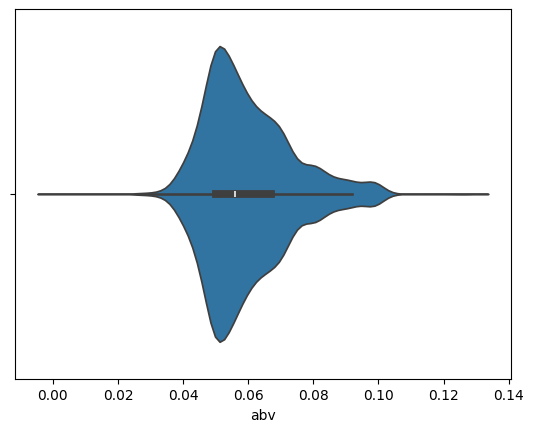

In [12]:
# Visualizando a distribuição da quantidade de álcool por cerveja em todas as cervejas
sns.violinplot(x=view_data['abv'])

<Axes: xlabel='abv'>

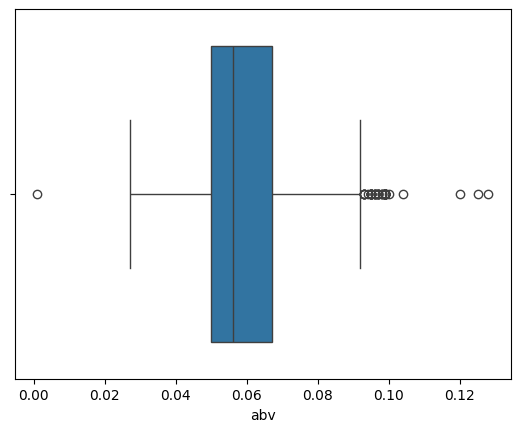

In [13]:
sns.boxplot(x=view_data['abv'])

## Distribuição dos valores de IBU

<Axes: xlabel='ibu'>

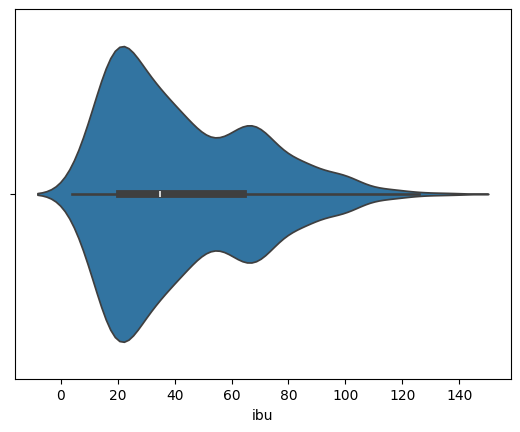

In [14]:
# Visualizando a distribuição da quantidade de amargor por cerveja em todas as cervejas
sns.violinplot(x=view_data['ibu'])

<Axes: xlabel='ibu'>

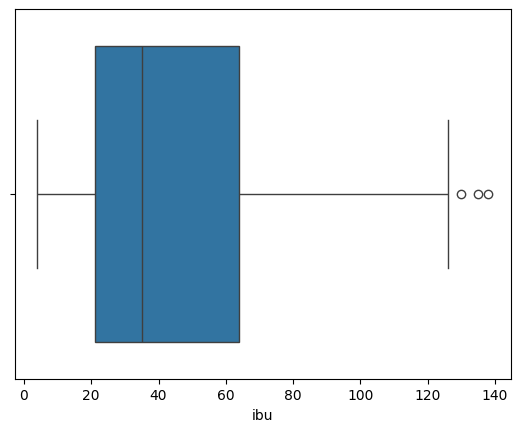

In [15]:
sns.boxplot(x=view_data['ibu'])

## Verificação de correlação entre ABV e IBU

In [16]:
view_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   abv           2348 non-null   float64 
 1   ibu           1405 non-null   float64 
 2   id            2410 non-null   int32   
 3   beer_name     2410 non-null   category
 4   style         2405 non-null   category
 5   brewery_id    2410 non-null   int32   
 6   ounces        2410 non-null   float64 
 7   brewery_name  2410 non-null   category
 8   city          2410 non-null   category
 9   state         2410 non-null   category
dtypes: category(5), float64(3), int32(2)
memory usage: 213.7 KB


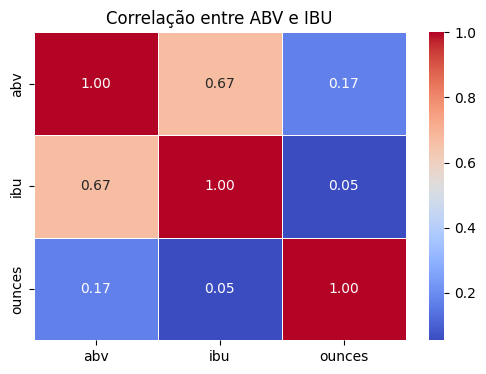

In [17]:
# Visualizando distribuição de valores de ibu e abv por tipo de cerveja
correlation_matrix = view_data[['abv', 'ibu', 'ounces']].corr()

# Criar heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre ABV e IBU")
plt.show()

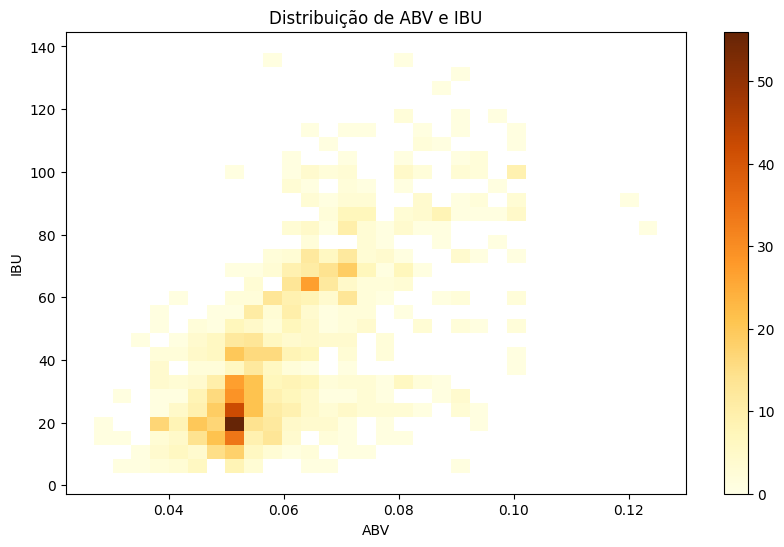

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=view_data, x="abv", y="ibu", bins=30, cmap="YlOrBr", cbar=True)
plt.title("Distribuição de ABV e IBU")
plt.xlabel("ABV")
plt.ylabel("IBU")
plt.show()

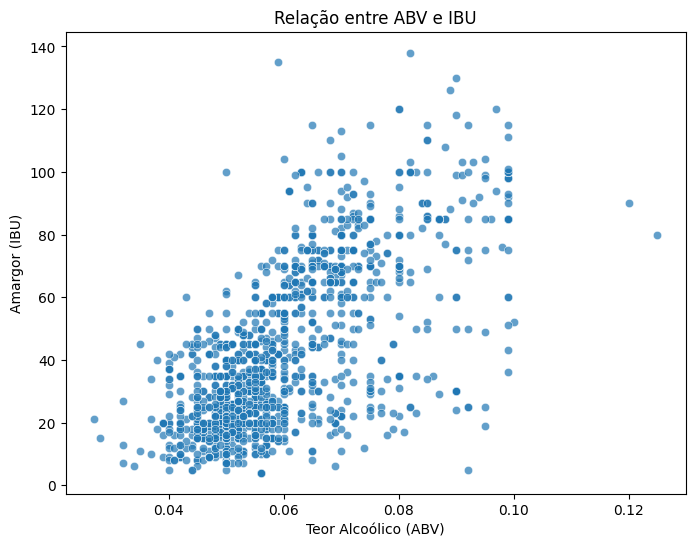

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=view_data, x="abv", y="ibu", alpha=0.7)
plt.title("Relação entre ABV e IBU")
plt.xlabel("Teor Alcoólico (ABV)")
plt.ylabel("Amargor (IBU)")
plt.show()

Pode-se afirmar que há uma correlação de médio a forte entre as variáveis ABV e IBU. Isso pode ser explicado por algumas questões, tais como:

* Certas cervejas com o ABV mais alto geralmente possuem mais lúpulo, o que aumenta o IBU;

Algums exemplos de cervejas que podem influenciar nessa correlação são:

* IPA's e Double IPA's, por exemplo, tem alto ABV e alto IBU;
* Lager's e Wheat Beers (Cervejas de Trigo), por exemplo, possuem baixo ABV e baixo IBU;

Nem sempre será verificado essas relações como certeza, mas é um ponto de análise válido.

## Verificação de tipos de cervejas

In [20]:
# Vamos fazer a verificação aqui da base de cervejas para ver a variedade de cervejas e poder ir mais a fundo:

style_df = pd.DataFrame(view_data['style'].value_counts())

In [21]:
# Ordenar os estilos pela contagem
style_df = style_df.sort_values("count", ascending=False)

# Calcular o total de amostras
total_amostras = style_df["count"].sum()

# Criar uma coluna de proporção acumulada
style_df["percent_acumulado"] = style_df["count"].cumsum() / total_amostras

# Filtrar os estilos que cobrem até 80% do total
df_pareto = style_df[style_df["percent_acumulado"] <= 0.80]

print(df_pareto)

                                     count  percent_acumulado
style                                                        
American IPA                           424           0.176299
American Pale Ale (APA)                245           0.278170
American Amber / Red Ale               133           0.333472
American Blonde Ale                    108           0.378378
American Double / Imperial IPA         105           0.422037
American Pale Wheat Ale                 97           0.462370
American Brown Ale                      70           0.491476
American Porter                         68           0.519751
Saison / Farmhouse Ale                  52           0.541372
Witbier                                 51           0.562578
Fruit / Vegetable Beer                  49           0.582952
Kölsch                                  42           0.600416
Hefeweizen                              40           0.617048
American Stout                          39           0.633264
American

C:\Users\victo\AppData\Local\Temp\ipykernel_28016\397106266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pareto, x="count", y=df_pareto.index, palette="magma")


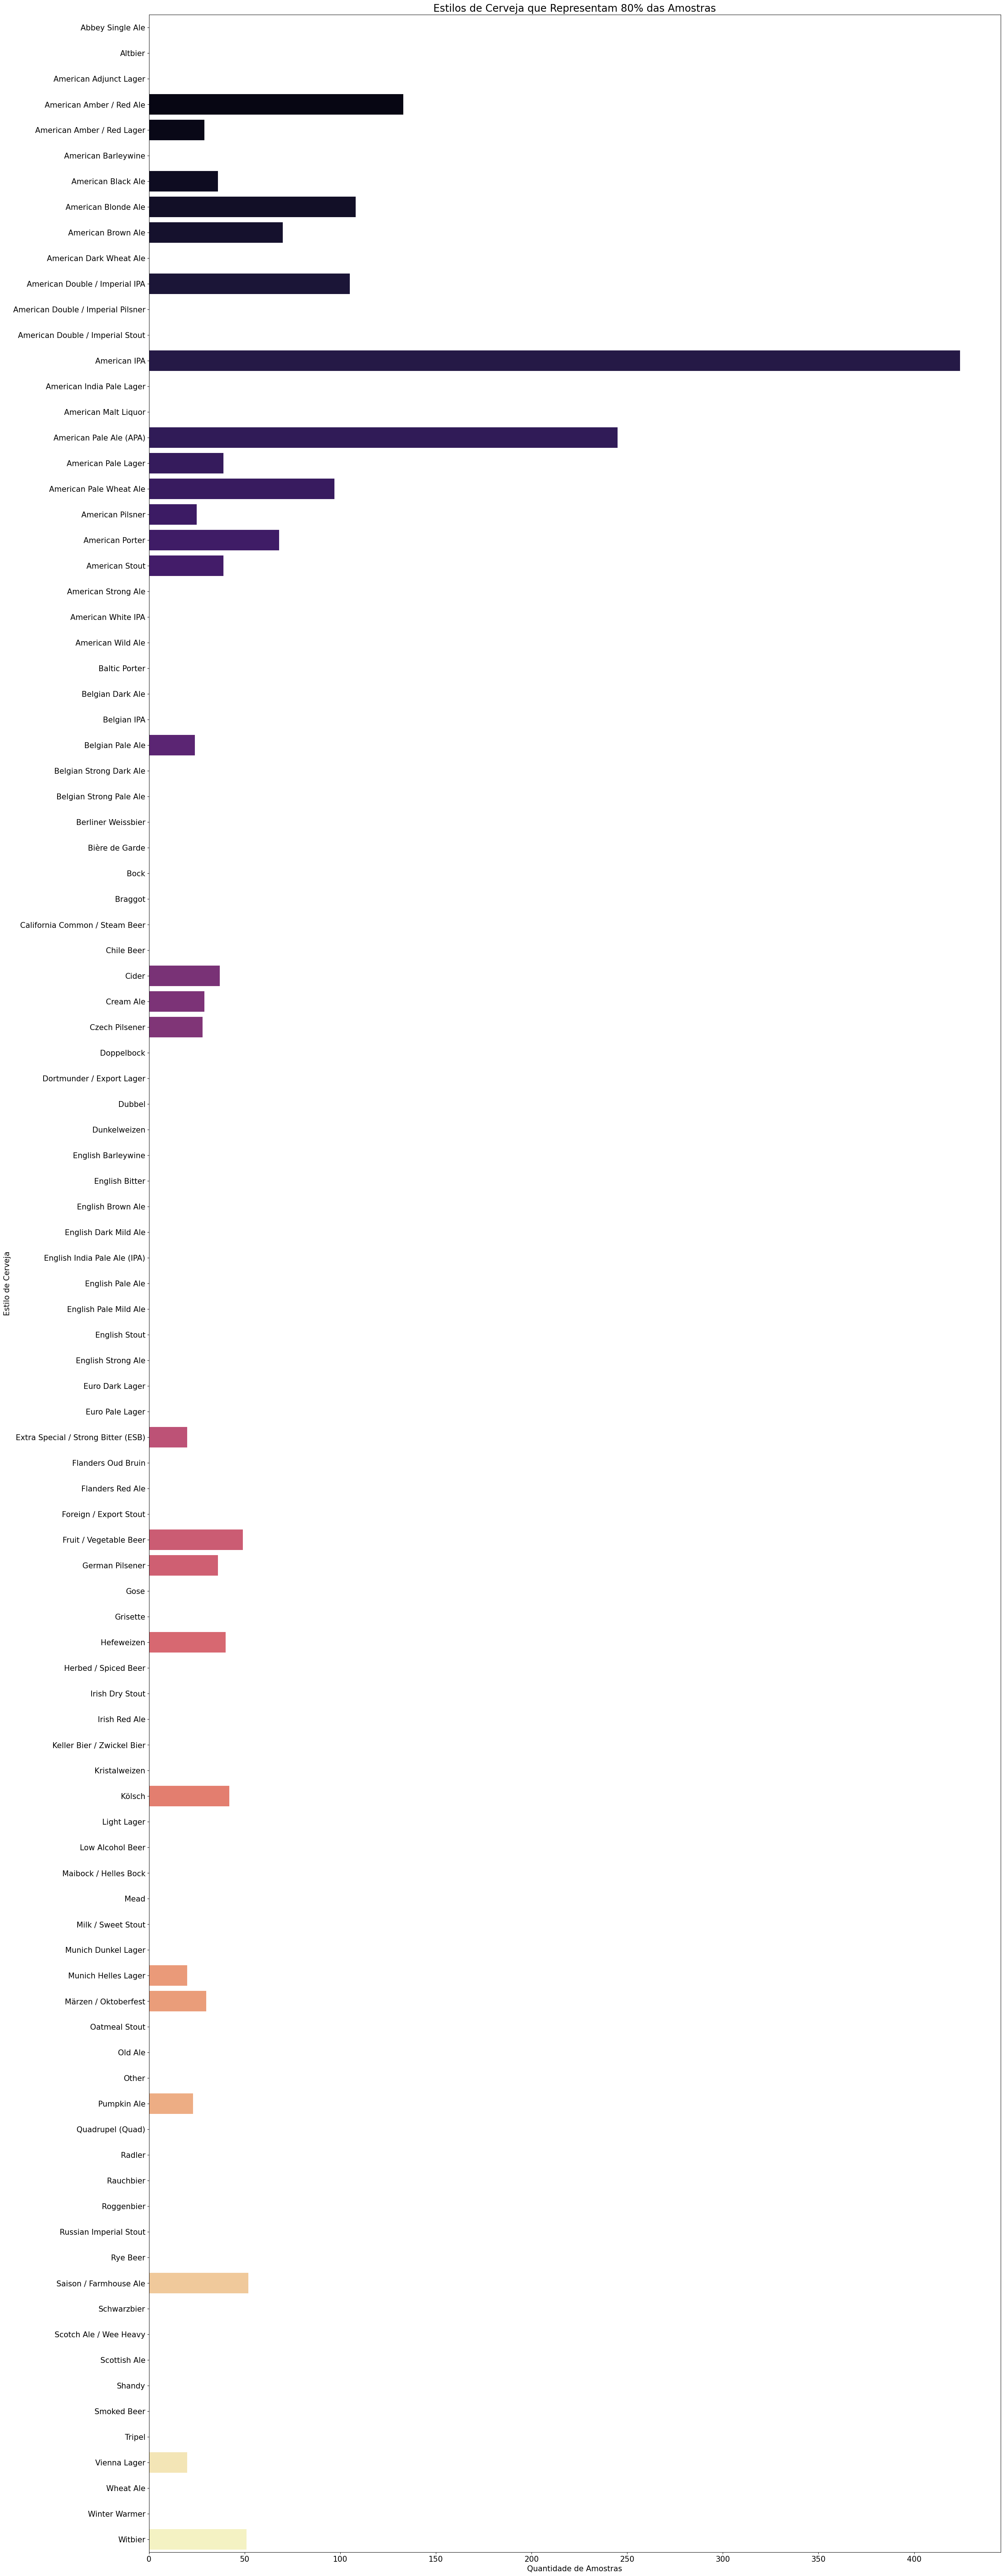

In [22]:
plt.figure(figsize=(30, 90))
sns.barplot(data=df_pareto, x="count", y=df_pareto.index, palette="magma")

plt.xlabel("Quantidade de Amostras", fontsize=15)
plt.ylabel("Estilo de Cerveja", fontsize=15)
plt.title("Estilos de Cerveja que Representam 80% das Amostras", fontsize=20)
plt.xticks(fontsize=15)  # Tamanho dos números do eixo X
plt.yticks(fontsize=15)  # Tamanho dos nomes dos estilos no eixo Y
plt.show()

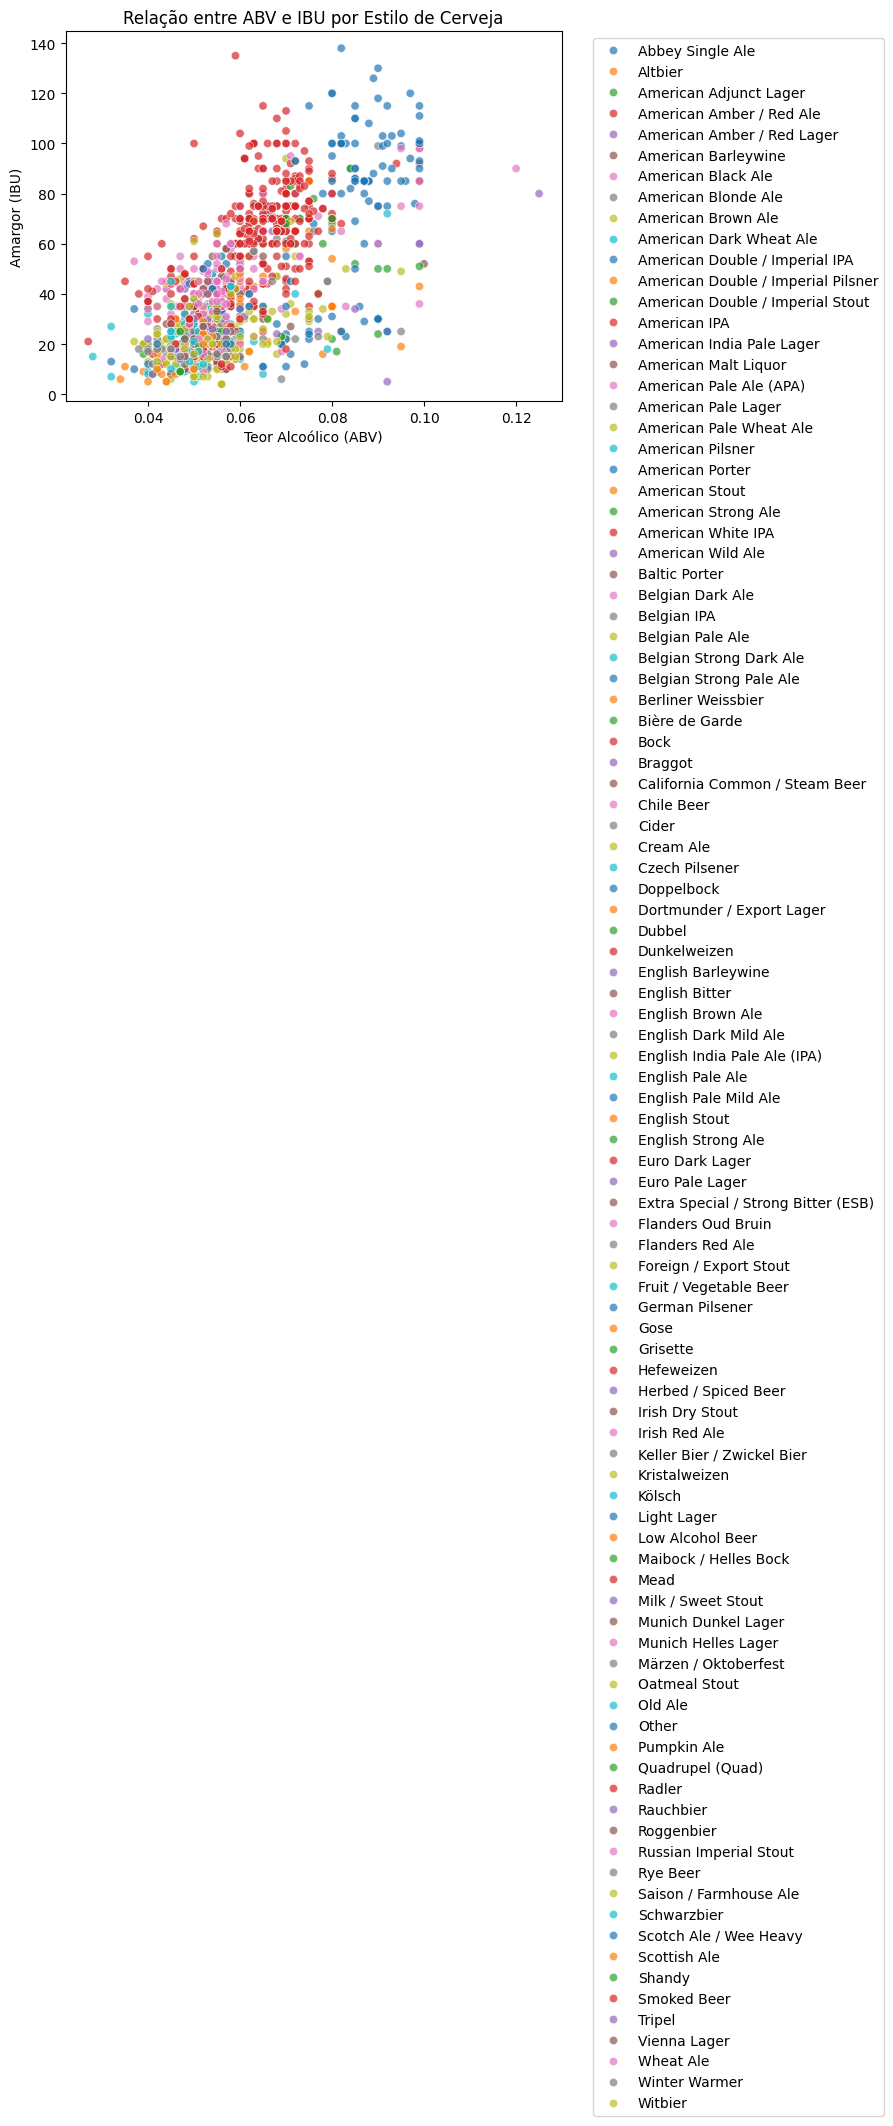

In [23]:
sns.scatterplot(
    data=view_data,  # Filtrar apenas estilos 80/20 # [view_data["style"].isin(df_pareto.index)]
    x="abv",
    y="ibu",
    hue="style",
    palette="tab10",  # Mudar para um esquema de cores mais diverso
    alpha=0.7  # Deixar um pouco transparente para evitar sobreposição
)

plt.xlabel("Teor Alcoólico (ABV)")
plt.ylabel("Amargor (IBU)")
plt.title("Relação entre ABV e IBU por Estilo de Cerveja")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # Mover a legenda para fora
plt.show()

## Visualização de dados por estado

In [24]:
view_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   abv           2348 non-null   float64 
 1   ibu           1405 non-null   float64 
 2   id            2410 non-null   int32   
 3   beer_name     2410 non-null   category
 4   style         2405 non-null   category
 5   brewery_id    2410 non-null   int32   
 6   ounces        2410 non-null   float64 
 7   brewery_name  2410 non-null   category
 8   city          2410 non-null   category
 9   state         2410 non-null   category
dtypes: category(5), float64(3), int32(2)
memory usage: 213.7 KB


C:\Users\victo\AppData\Local\Temp\ipykernel_28016\3784634731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_state_abv = view_data.groupby("state")["abv"].mean().reset_index()
C:\Users\victo\AppData\Local\Temp\ipykernel_28016\3784634731.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=view, x="state", y="abv", palette="Blues", dodge=False)


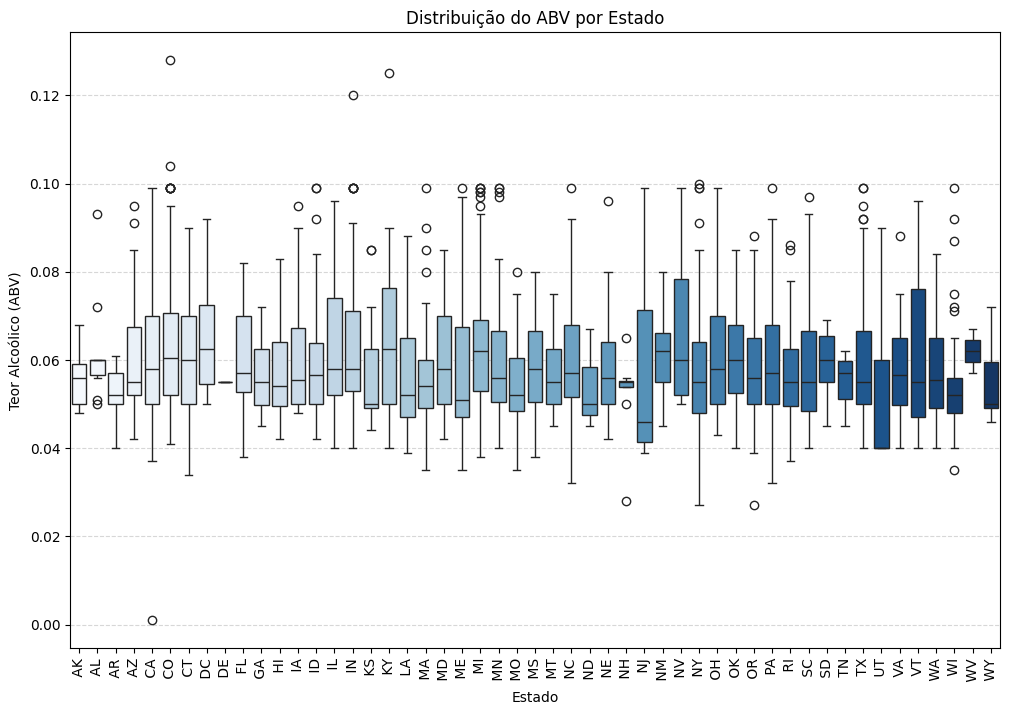

In [25]:
# Calcular a média de ABV por estado
df_state_abv = view_data.groupby("state")["abv"].mean().reset_index()
df_state_abv.rename(columns={"abv": "mean_abv"}, inplace=True)

# Mesclar as médias de ABV no DataFrame original
view = view_data.merge(df_state_abv, on="state", how="left")

# Ordenar os estados pela média de ABV (do maior para o menor)
view["state"] = view["state"].astype("category")
view["state"] = view["state"].cat.reorder_categories(
    df_state_abv.sort_values("mean_abv", ascending=False)["state"], ordered=True
)

# Criar o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=view, x="state", y="abv", palette="Blues", dodge=False)

# Ajustes do gráfico
plt.xlabel("Estado")
plt.ylabel("Teor Alcoólico (ABV)")
plt.title("Distribuição do ABV por Estado")
plt.xticks(rotation=90)  # Rotaciona os nomes dos estados
plt.grid(axis="y", linestyle="--", alpha=0.5)
 #plt.colorbar(label="Média de ABV")  # Adiciona barra de cores

plt.show()

## Visualização de dados de cervejarias 

In [26]:
# Calcular a média de ABV por cervejaria e ordenar do maior para o menor
df_abv_sorted = view_data.groupby("brewery_name")["abv"].mean().reset_index()
df_abv_sorted.rename(columns={"abv": "mean_abv"}, inplace=True)
df_abv_sorted = df_abv_sorted.sort_values("mean_abv", ascending=False)

# Exibir o DataFrame ordenado
df_abv_sorted


C:\Users\victo\AppData\Local\Temp\ipykernel_28016\2253583862.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_abv_sorted = view_data.groupby("brewery_name")["abv"].mean().reset_index()


,brewery_name,mean_abv
390,Portside Brewery,0.0990
130,Christian Moerlein Brewing Company,0.0890
49,Beach Brewing Company,0.0880
440,SlapShot Brewing Company,0.0835
336,Mountain Town Brewing Company,0.0820
...,...,...
264,Iron Hill Brewery & Restaurant,NaN
277,Keweenaw Brewing Company,NaN
391,Prescott Brewing Company,NaN
452,Spilker Ales,NaN


In [27]:
df_abv_sorted.describe()

,mean_abv
count,539.000000
mean,0.057992
std,0.008618
min,0.035000
25%,0.052367
50%,0.057333
75%,0.062837
max,0.099000


In [28]:
# Calcular a média de ABV por cervejaria e ordenar do maior para o menor
df_ibu_sorted = view_data.groupby("brewery_name")["ibu"].mean().reset_index()
df_ibu_sorted.rename(columns={"ibu": "mean_ibu"}, inplace=True)
df_ibu_sorted = df_ibu_sorted.sort_values("mean_ibu", ascending=False)

# Exibir o DataFrame ordenado
df_ibu_sorted

C:\Users\victo\AppData\Local\Temp\ipykernel_28016\231987956.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ibu_sorted = view_data.groupby("brewery_name")["ibu"].mean().reset_index()


,brewery_name,mean_ibu
544,Wolf Hills Brewing Company,135.0
130,Christian Moerlein Brewing Company,126.0
482,The Alchemist,120.0
49,Beach Brewing Company,108.0
411,Rivertowne Brewing Company,100.0
...,...,...
533,White Birch Brewing,NaN
534,White Flame Brewing Company,NaN
538,Wildwood Brewing Company,NaN
539,Wind River Brewing Company,NaN


# Agora vamos para alguns modelos que poderiamos usar para tentar prever

## Módelo de Regressão linear
### Aplicaremos o modelo LienarRegression do scikit-learn para avaliar se os resultados são satisfatórios.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [30]:
view_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   abv           2348 non-null   float64 
 1   ibu           1405 non-null   float64 
 2   id            2410 non-null   int32   
 3   beer_name     2410 non-null   category
 4   style         2405 non-null   category
 5   brewery_id    2410 non-null   int32   
 6   ounces        2410 non-null   float64 
 7   brewery_name  2410 non-null   category
 8   city          2410 non-null   category
 9   state         2410 non-null   category
dtypes: category(5), float64(3), int32(2)
memory usage: 213.7 KB


In [31]:
# Copiar dataframe original para evitar modificações diretas
df_linear_regression = view_data.copy()

# Separando variáveis entre variável target (y) e variáveis de entrada (x)
# Features consideradas, testei alguns cruzamentos diferentes e as metricas:
# Não tem um efeito tão grande no resultado e nem nas métricas
x = df_linear_regression[["ibu", "brewery_id", "style", "ounces", "state"]]
y = df_linear_regression["abv"] 

# Aplicar Label Encoding nas colunas categóricas: style e state
encoder = LabelEncoder()
df_linear_regression["style"] = encoder.fit_transform(df_linear_regression["style"])
df_linear_regression["state"] = encoder.fit_transform(df_linear_regression["state"])

# Criando um inputer para substituir valor NaN pela mediana do conjunto
imputer = SimpleImputer(strategy="median")

# Aplicar o imputador às features (incluindo 'style' agora)
x = imputer.fit_transform(df_linear_regression[["ibu", "brewery_id", "style", "ounces", "state"]])

# Tratar NaN no alvo (y) separadamente, se necessário
y = y.fillna(y.median())  # Usar a mediana para preencher NaN

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 0.00777740043447623


In [32]:
# Cálculo de métricas: 

mae = mean_absolute_error(y_test, y_pred)                   # MAE - Erro absoluto médio
mse = mean_squared_error(y_test, y_pred)                    # MSE - Erro quadrático médio
rmse = np.sqrt(mse)                                         # RMSE - Raiz do erro quadrático médio
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100    # MAPE - Erro percentual absoluto médio
r2 = r2_score(y_test, y_pred)                               # R² - Coeficiente de determinação
n = len(y_test)                                             # RSE - Início do cálculo
p = X_train.shape[1]                                        # RSE - Número de variáveis independentes
rss = np.sum((y_test - y_pred) ** 2)                        # RSE - Soma dos resíduos ao quadrado
rse = np.sqrt(rss / (n - p - 1))                            # RSE - Erro padrão residual

# Exibir métricas
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")
print(f"RSE: {rse:.4f}")

MAE: 0.0078
MSE: 0.0001
RMSE: 0.0110
MAPE: 12.50%
R² Score: 0.3272
RSE: 0.0110


### Resultado do modelo: 

O primeiro ponto é que a relação entre as variáveis "ibu", "brewery_id", "style", "ounces", "state" não tem necessariamente uma relação linear com a variável target "abv".
Percebe-se também que este modelo não tev uma boa adequação mesmo variando as variáveis de input e também os inputers utilizados. 
O maior problema deste modelo é que ele parece sempre sofrer com underfitting, como podemos ver pelos scores de R² baixos e um alto MAPE, e também com a falta de adequação ao caso de uso.

Esse seria um problema de classificação, portanto, vamos mudar um pouco o que tínhamos feito e vamos agora considerar que a missão será responder a seguinte indagação:

* **De acordo com o nível de ABV e IBU de uma cerveja, qual tipo de cerveja estamos falando?**



## Modelo RandomForest

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

In [34]:
df_RandomForest = view_data.copy()

In [35]:
# Definir variáveis
X = df_RandomForest[['abv', 'ibu']]  # Features
y = df_RandomForest['style']  # Target

# Tratar NaNs (preencher com mediana)
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

# Transformar os estilos em números
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Dado que este erro aconteceu, é importante também fazermos algumas modificações nos dados para este cenário como, por exemplo, eliminar as categorias com apenas 1 ocorrência, o que impossibilitou a divisão de treino e teste.

In [36]:
# Contar quantas vezes cada estilo aparece
style_counts = df_RandomForest['style'].value_counts()

# Filtrar estilos que aparecem pelo menos 2 vezes
valid_styles = style_counts[style_counts > 1].index
df_filtered = df_RandomForest[df_RandomForest['style'].isin(valid_styles)]

# Definir variáveis
X = df_filtered[['abv', 'ibu']]  # Features
y = df_filtered['style']  # Target

# Tratar NaNs (preencher com mediana)
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Transformar os estilos em números
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Ajustar os nomes corretos das classes com base nos dados de teste
target_names = encoder.inverse_transform(np.unique(y_test))  # CORREÇÃO AQUI

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=target_names))

Acurácia: 0.3006
                                     precision    recall  f1-score   support

                            Altbier       0.00      0.00      0.00         3
             American Adjunct Lager       1.00      0.75      0.86         4
           American Amber / Red Ale       0.27      0.30      0.28        27
         American Amber / Red Lager       0.20      0.17      0.18         6
                American Barleywine       0.00      0.00      0.00         1
                 American Black Ale       0.33      0.29      0.31         7
                American Blonde Ale       0.19      0.19      0.19        21
                 American Brown Ale       0.25      0.14      0.18        14
            American Dark Wheat Ale       0.00      0.00      0.00         1
     American Double / Imperial IPA       0.58      0.71      0.64        21
   American Double / Imperial Stout       0.00      0.00      0.00         2
                       American IPA       0.56      0.73  

c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Isso nos indica algumas coisas importantes que precisamos fazer:

* O número de classes que temos em styles é muito alto e muito estratificado, o que acaba impactando o modelo como podemos ver no classification_reprot, que alem de métricas gerais do modelo apresenta métricas para cada possível classe de classificação. Temos várias classes com suporte <4 o que indica poucas ocorrências daquela classse 

Para resolver isso deveremos fazer uma reorganização e um agrupamento das classes para poder deixar com uma quantidade de classes qeu represente ainda assim mas que nao seja tão fragmentada.

In [37]:
unique_styles = df_RandomForest['style'].unique().tolist()
print(unique_styles)

['American Pale Lager', 'American Pale Ale (APA)', 'American IPA', 'American Double / Imperial IPA', 'Oatmeal Stout', 'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA', 'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine', 'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer', 'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale', 'American Blonde Ale', 'American Amber / Red Ale', 'Berliner Weissbier', 'American Brown Ale', 'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'Kölsch', 'English Pale Ale', 'American Amber / Red Lager', 'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener', 'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner', 'American Wild Ale', 'English Brown Ale', 'Altbier', 'California Common / Steam Beer', 'Gose', 'Cream Ale', 'Vienna Lager', 'Witbier', 'American Double / Imperial Stout', 'Munich Helles Lager', 'Schwarzbier', 'Märzen / Oktoberfest', 'Extra Special / Strong Bitter (ESB)', 'Rye Beer', 'Euro Dark Lager', 'Hefewei

In [50]:
style_mapping = {
    # 🍺 Lagers
    "American Pale Lager": "Lagers",
    "American Pilsner": "Lagers",
    "American Adjunct Lager": "Lagers",
    "Light Lager": "Lagers",
    "Euro Pale Lager": "Lagers",
    "Euro Dark Lager": "Lagers",
    "Czech Pilsener": "Lagers",
    "Dortmunder / Export Lager": "Lagers",
    "Munich Helles Lager": "Lagers",
    "Munich Dunkel Lager": "Lagers",
    "Schwarzbier": "Lagers",
    "Vienna Lager": "Lagers",
    "Märzen / Oktoberfest": "Lagers",
    "Keller Bier / Zwickel Bier": "Lagers",
    "American India Pale Lager": "Lagers",
    "Kölsch": "Lagers",
    "German Pilsener": "Lagers",


    # 🍻 Ales
    "American Pale Ale (APA)": "Ales",
    "English Pale Ale": "Ales",
    "English India Pale Ale (IPA)": "Ales",
    "American IPA": "Ales",
    "American White IPA": "Ales",
    "Belgian IPA": "Ales",
    "American Black Ale": "Ales",
    "American Strong Ale": "Ales",
    "American Amber / Red Ale": "Ales",
    "American Brown Ale": "Ales",
    "English Brown Ale":"Ales",
    "Cream Ale": "Ales",
    "American Blonde Ale": "Ales",
    "English Bitter": "Ales",
    "Extra Special / Strong Bitter (ESB)": "Ales",
    "Irish Red Ale": "Ales",
    "Scottish Ale": "Ales",
    "English Dark Mild Ale": "Ales",
    "English Pale Mild Ale": "Ales",
    "Altbier": "Ales",
    "California Common / Steam Beer": "Ales",
    "American Dark Wheat Ale": "Ales",
    "Grisette": "Ales",
    "American Amber / Red Lager": "Ales",
    "American Double / Imperial IPA": "Ales",  # Corrigido!
    "American Double / Imperial Pilsner": "Ales",

    # 🌾 Wheat Beers
    "Hefeweizen": "Wheat Beers",
    "Dunkelweizen": "Wheat Beers",
    "Kristalweizen": "Wheat Beers",
    "Witbier": "Wheat Beers",
    "American Pale Wheat Ale": "Wheat Beers",
    "Wheat Ale": "Wheat Beers",
    "Roggenbier": "Wheat Beers",

    # ☕ Stouts & Porters
    "American Stout": "Stouts & Porters",
    "American Double / Imperial Stout": "Stouts & Porters",
    "Oatmeal Stout": "Stouts & Porters",
    "Milk / Sweet Stout": "Stouts & Porters",
    "Foreign / Export Stout": "Stouts & Porters",
    "Russian Imperial Stout": "Stouts & Porters",
    "English Stout": "Stouts & Porters",
    "Irish Dry Stout": "Stouts & Porters",
    "American Porter": "Stouts & Porters",
    "Baltic Porter": "Stouts & Porters",

    # 🇧🇪 Belgian Styles
    "Saison / Farmhouse Ale": "Belgian Styles",
    "Belgian IPA": "Belgian Styles",
    "Belgian Pale Ale": "Belgian Styles",
    "Belgian Dark Ale": "Belgian Styles",
    "Belgian Strong Dark Ale": "Belgian Styles",
    "Belgian Strong Pale Ale": "Belgian Styles",
    "Abbey Single Ale": "Belgian Styles",
    "Dubbel": "Belgian Styles",
    "Tripel": "Belgian Styles",
    "Quadrupel (Quad)": "Belgian Styles",
    "Bière de Garde": "Belgian Styles",

    # 🔥 Bocks & Strong Lagers
    "Bock": "Bocks & Strong Lagers",
    "Doppelbock": "Bocks & Strong Lagers",
    "Maibock / Helles Bock": "Bocks & Strong Lagers",
    "American Barleywine": "Bocks & Strong Lagers",
    "English Barleywine": "Bocks & Strong Lagers",
    "Old Ale": "Bocks & Strong Lagers",
    "English Strong Ale": "Bocks & Strong Lagers",
    "Winter Warmer": "Bocks & Strong Lagers",
    "Scotch Ale / Wee Heavy": "Bocks & Strong Lagers",

    # 🍋 Sour & Wild Beers
    "American Wild Ale": "Sour & Wild Beers",
    "Berliner Weissbier": "Sour & Wild Beers",
    "Gose": "Sour & Wild Beers",
    "Flanders Red Ale": "Sour & Wild Beers",
    "Flanders Oud Bruin": "Sour & Wild Beers",
    "Rauchbier": "Sour & Wild Beers",
    "Smoked Beer": "Sour & Wild Beers",

    # 🎭 Specialty Beers
    "Pumpkin Ale": "Specialty Beers",
    "Radler": "Specialty Beers",
    "Chile Beer": "Specialty Beers",
    "Fruit / Vegetable Beer": "Specialty Beers",
    "Herbed / Spiced Beer": "Specialty Beers",
    "Mead": "Specialty Beers",
    "Braggot": "Specialty Beers",
    "Other": "Specialty Beers",
    "Low Alcohol Beer": "Specialty Beers",
    "American Malt Liquor": "Specialty Beers",
    "Shandy": "Specialty Beers",
    "Cider": "Specialty Beers",
    "Rye Beer": "Specialty Beers",
}

# Aplicar o mapeamento ao DataFrame
df["beer_category"] = df["style"].map(style_mapping).fillna("Other")

# Exibir as primeiras linhas para conferir
df[["style", "beer_category"]].head()

df_RandomForest = df.copy()

In [39]:
# Lista dos estilos únicos do seu DataFrame
unique_styles = set(df['style'].dropna().unique())

mapped_styles = set(style_mapping.keys())
missing_styles = unique_styles - mapped_styles
print("Estilos que não foram mapeados:", missing_styles)

Estilos que não foram mapeados: set()


In [40]:
df_RandomForest['beer_category'].value_counts()

beer_category
Ales                     1339
Lagers                    302
Wheat Beers               196
Stouts & Porters          174
Specialty Beers           154
Belgian Styles            147
Bocks & Strong Lagers      61
Sour & Wild Beers          32
Other                       5
Name: count, dtype: int64

O dataset é desbalanceado, podemos ver que Ales possui algo próximo da metade dos registros e tem outras categorias que nao tem nem 5% dos registros.
Podemos implementar algumas técnicas como SMOTE, para oversamplig, ou aplicar técnicas de undersampling para as classes majoritárias.
Além disso, no algoritmo de Random Forest podemos fazer a utilização de pesos para dar mais importância às classes menores.

Vamos iniciar testando o modelo puro para termos um baseline.

In [41]:


# Contar quantas vezes cada estilo aparece
style_counts = df_RandomForest['beer_category'].value_counts()

# Filtrar estilos que aparecem pelo menos 2 vezes
valid_styles = style_counts[style_counts > 3].index
df_filtered = df_RandomForest[df_RandomForest['beer_category'].isin(valid_styles)]

# Definir variáveis
X = df_filtered[['abv', 'ibu']]  # Features
y = df_filtered['beer_category']  # Target

# Tratar NaNs (preencher com mediana)
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Transformar os estilos em números
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Ajustar os nomes corretos das classes com base nos dados de teste
target_names = encoder.inverse_transform(np.unique(y_test))  # CORREÇÃO AQUI

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=target_names))

Acurácia: 0.5581
                       precision    recall  f1-score   support

                 Ales       0.64      0.85      0.73       268
       Belgian Styles       0.21      0.13      0.16        30
Bocks & Strong Lagers       0.33      0.17      0.22        12
               Lagers       0.35      0.25      0.29        60
                Other       0.00      0.00      0.00         1
    Sour & Wild Beers       0.17      0.17      0.17         6
      Specialty Beers       0.45      0.16      0.24        31
     Stouts & Porters       0.33      0.14      0.20        35
          Wheat Beers       0.34      0.26      0.29        39

             accuracy                           0.56       482
            macro avg       0.32      0.24      0.26       482
         weighted avg       0.51      0.56      0.51       482



c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Obtivemos uma melhora do modelo, certamente estamos indo para um caminho legal, porém ainda há ações a serem feitas para poder ter um modelo melhor.
Esse modelo reflete o que já vimos antes, um modelo desbalanceado que acerta mais para as classes que temos mais observações.

Vamos testar duas alterações, uma de cada vez: Tenicas de undersampling para reduzir o tamanho da classe dominanate e técnicas de ajustes de pesos  

#### Undersampling: Random Undersampling

In [42]:
df_RandomForest.columns

Index(['abv', 'ibu', 'id', 'beer_name', 'style', 'brewery_id', 'ounces',
       'brewery_name', 'city', 'state', 'beer_category'],
      dtype='object')

In [43]:
from imblearn.under_sampling import RandomUnderSampler

# Separar features e target
X = df_RandomForest[["abv", "ibu"]]
y = df_RandomForest["beer_category"]

# Aplicar undersampling para equilibrar as classes (limitando a 30 amostras por classe onde houver excesso)
undersampler = RandomUnderSampler(
    sampling_strategy={c: 100 for c in y.value_counts().index if y.value_counts()[c] > 100}, 
    random_state=42
)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Tratar NaNs (preencher com média ou mediana)
imputer = SimpleImputer(strategy="mean")  # ou "median"
X_resampled = imputer.fit_transform(X_resampled)

# Transformar os estilos em números
encoder = LabelEncoder()
y_resampled_encoded = encoder.fit_transform(y_resampled)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_encoded, test_size=0.2, random_state=42, stratify=y_resampled_encoded
)

# Criar e treinar o modelo com pesos balanceados
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight="balanced_subsample")
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Ajustar os nomes corretos das classes
target_names = encoder.inverse_transform(np.unique(y_test))

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=target_names))


Acurácia: 0.3000
                       precision    recall  f1-score   support

                 Ales       0.73      0.55      0.63        20
       Belgian Styles       0.36      0.20      0.26        20
Bocks & Strong Lagers       0.40      0.33      0.36        12
               Lagers       0.23      0.15      0.18        20
                Other       0.33      1.00      0.50         1
    Sour & Wild Beers       0.13      0.29      0.18         7
      Specialty Beers       0.21      0.35      0.26        20
     Stouts & Porters       0.20      0.10      0.13        20
          Wheat Beers       0.28      0.40      0.33        20

             accuracy                           0.30       140
            macro avg       0.32      0.37      0.31       140
         weighted avg       0.33      0.30      0.30       140



Após realizar alguns testes variando os diversos parâmetros do modelo, chegamos a conclusão de que realmente a técnica de undersampling não está funcionando a ponto de atingirmos o objetivo que queríamos. 
Vamos trocar a abordagem e vamos realizar um SMOTE 

In [44]:
from imblearn.over_sampling import SMOTE

# Separar features e target
X = df_RandomForest[["abv", "ibu"]]
y = df_RandomForest["beer_category"]

# Tratar NaNs (preencher com média ou mediana)
imputer = SimpleImputer(strategy="mean")  # ou "median"
X = imputer.fit_transform(X)

# Transformar os estilos em números
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Ajustar SMOTE para lidar com classes pequenas
smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=4)  # Reduzi para 2 vizinhos
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Criar e treinar o modelo com pesos balanceados
model = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=10, class_weight="balanced")
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Ajustar os nomes corretos das classes
target_names = encoder.inverse_transform(np.unique(y_test))

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=target_names))

Acurácia: 0.5678
                       precision    recall  f1-score   support

                 Ales       0.72      0.41      0.52       268
       Belgian Styles       0.53      0.46      0.49       268
Bocks & Strong Lagers       0.61      0.76      0.68       268
               Lagers       0.37      0.56      0.45       268
                Other       0.73      1.00      0.84       268
    Sour & Wild Beers       0.54      0.69      0.61       268
      Specialty Beers       0.53      0.35      0.42       268
     Stouts & Porters       0.60      0.32      0.42       267
          Wheat Beers       0.58      0.55      0.57       268

             accuracy                           0.57      2411
            macro avg       0.58      0.57      0.56      2411
         weighted avg       0.58      0.57      0.56      2411



Vamos tentar utilizar o SmoteTEK para poder fazer o oversampling.

In [45]:
df_RandomForest[df_RandomForest["beer_category"] == "Other"]

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state,beer_category
566,NaN,NaN,2210,Special Release,NaN,29,16.0,Cedar Creek Brewery,Seven Points,TX,Other
853,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0,Four Peaks Brewing Company,Tempe,AZ,Other
866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0,Freetail Brewing Company,San Antonio,TX,Other
1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0,Oskar Blues Brewery,Longmont,CO,Other
1555,NaN,NaN,1790,CAN'D AID Foundation,NaN,166,12.0,Oskar Blues Brewery,Longmont,CO,Other


In [46]:
from imblearn.combine import SMOTETomek

# Filtrar a categoria "Other"
df_filtered = df_RandomForest[df_RandomForest["beer_category"] != "Other"]

# Separar features e target
X = df_filtered[["abv", "ibu"]]
y = df_filtered["beer_category"]

# Tratar NaNs (preencher com média ou mediana)
imputer = SimpleImputer(strategy="mean")  # ou "median"
X = imputer.fit_transform(X)

# Transformar os estilos em números
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Aplicar SMOTETomek com menos vizinhos
smote_tomek = SMOTETomek(sampling_strategy="auto", random_state=42, smote=SMOTE(k_neighbors=6))
X_resampled, y_resampled = smote_tomek.fit_resample(X, y_encoded)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Criar e treinar o modelo com pesos balanceados
model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, class_weight="balanced")
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Ajustar os nomes corretos das classes
target_names = encoder.inverse_transform(np.unique(y_test))

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=target_names))


Acurácia: 0.5576
                       precision    recall  f1-score   support

                 Ales       0.74      0.43      0.54       258
       Belgian Styles       0.56      0.39      0.46       206
Bocks & Strong Lagers       0.63      0.76      0.69       187
               Lagers       0.45      0.66      0.53       222
    Sour & Wild Beers       0.63      0.74      0.68       182
      Specialty Beers       0.46      0.48      0.47       199
     Stouts & Porters       0.47      0.44      0.45       193
          Wheat Beers       0.61      0.61      0.61       210

             accuracy                           0.56      1657
            macro avg       0.57      0.56      0.56      1657
         weighted avg       0.57      0.56      0.55      1657



Mesmo mexendo um pouco com os hiperparâmetros do modelo e mudando a técnica de oversampling de SMOTE para SMOTETOMEK ainda não estamos considerando um resultado bom.
O modelo tem problemas com as classes dominadas e não consegue ser efetivo. 
Vamos partir para outra técnica que lida melhor com dados desbalanceados: Gradient Boosting.

## Gradient Boosting

### Testando o XGBoost

In [52]:
from xgboost import XGBClassifier
df_Xgboost = df.copy()
df_Xgboost.head(3)

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state,beer_category
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR,Lagers
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN,Ales
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN,Ales


In [72]:
df_filtered = df_Xgboost[df_Xgboost['beer_category']!='Other']
# Separar features e target
X = df_Xgboost[["abv", "ibu"]]
y = df_Xgboost["style"]

# Tratar NaNs
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)


# Transformar os estilos em números
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Aplicar SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=2)
X_resampled, y = smote.fit_resample(X, y_encoded)

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Criar e treinar o modelo XGBoost
model = XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Ajustar os nomes das classes
target_names = encoder.inverse_transform(np.unique(y_test))

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=target_names))

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 3, n_samples_fit = 2, n_samples = 2

### Catboost

In [56]:
from catboost import CatBoostClassifier
df_Catboost = df.copy()
df_Catboost.head(3)

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state,beer_category
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR,Lagers
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN,Ales
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN,Ales


In [ ]:
# 🔹 Garantir que não há NaNs
for col in df_Catboost.columns:
    if df_Catboost[col].dtype in ["category", "object"]:  
        df_Catboost[col] = df_Catboost[col].astype(str).fillna("Unknown")
    elif np.issubdtype(df_Catboost[col].dtype, np.number):  
        df_Catboost[col] = df_Catboost[col].fillna(df_Catboost[col].median())

assert df_Catboost.isnull().sum().sum() == 0, "Ainda existem NaNs!"

# 🔹 Label Encoding para `beer_category` e `style`
encoder_beer = LabelEncoder()
df_Catboost["beer_category"] = encoder_beer.fit_transform(df_Catboost["beer_category"])

encoder_style = LabelEncoder()
df_Catboost["style"] = encoder_style.fit_transform(df_Catboost["style"])



# 🔹 Selecionar apenas `abv` e `ibu` como features para predizer `style`
X = df_Catboost[["abv", "ibu","beer_category"]]
y = df_Catboost["style"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 🔹 Identificar classes com poucos registros
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < 2].index.tolist()

# 🔹 Remover essas classes do dataset
mask = ~y.isin(rare_classes)
X, y = X[mask], y[mask]

# 🔹 Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 🔹 Criando e treinando o modelo CatBoost
model = CatBoostClassifier(
    iterations=100, depth=6, learning_rate=0.05, loss_function='MultiClass',
    verbose=100
)

model.fit(X_train, y_train)

# 🔹 Fazendo previsões
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  

# 🔹 Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

# 🔹 Invertendo labels corretamente
target_names = list(map(str, encoder_style.inverse_transform(np.unique(y_test))))
print(classification_report(y_test, y_pred, target_names=target_names))

0:	learn: 4.1107600	total: 33.8ms	remaining: 3.35s
99:	learn: 1.7326812	total: 3.27s	remaining: 0us
Acurácia: 0.4236
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.25      0.20      0.22         5
           3       0.19      0.12      0.15        40
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        11
           7       0.31      0.41      0.35        32
           8       1.00      0.05      0.09        21
           9       0.00      0.00      0.00         2
          10       0.62      0.90      0.74        31
          11       0.00      0.00      0.00         1
          12       0.50      0.33      0.40         3
          13       0.66      0.75      0.70       127
          14       0.00      0.00      0.00         1
          16      

c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\Documents\FIAP\Codes\Modulo 3\Tech Challenge\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Ainda assim não conseguimos um resultado satisfatório para essa 

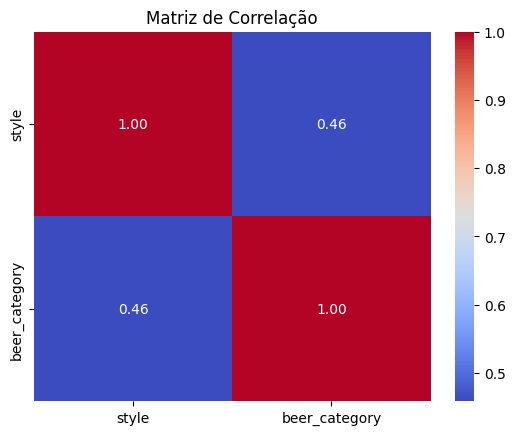

In [92]:

corr_matrix = df_Catboost[['style', 'beer_category']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()